## Clustering - Customer Segmentation

### 1. Introduction

This dataset comprises information about customers of a mall, including their `age`, `gender`, `annual income`, and `spending scores`. The purpose of the analysis is to segment the customers into distinct groups using K-Means clustering, based on their spending behavior and demographic characteristics. This segmentation aids in understanding customer patterns and tailoring marketing strategies to target specific customer groups more effectively.

### 2. Importing Libraries

Essential Python libraries for data analysis and visualization will be imported, such as pandas, numpy, matplotlib, and seaborn.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import drive
drive.mount('/content/drive')

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

# Display the first few rows of the dataframe
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2. Exploration of Data

Load the data using pandas and perform an initial exploration to understand its structure, contents, and any peculiarities that need addressing.

In [12]:
# Basic statistical summary of the numerical columns
data_description = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

data_description, missing_values

(       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          200.000000              200.000000
 mean   100.500000   38.850000           60.560000               50.200000
 std     57.879185   13.969007           26.264721               25.823522
 min      1.000000   18.000000           15.000000                1.000000
 25%     50.750000   28.750000           41.500000               34.750000
 50%    100.500000   36.000000           61.500000               50.000000
 75%    150.250000   49.000000           78.000000               73.000000
 max    200.000000   70.000000          137.000000               99.000000,
 CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64)

The exploration of the data reveals the following:

- The dataset contains 200 entries.
- The mean age of the customers is approximately 38.85 years, with a standard deviation of about 13.97 years. The ages range from 18 to 70 years.
- The average annual imcome is around $60.56k, with a standard deviation of $26.26k. The income ranges from $15k to $137k.
- The spending score, which ranges from 1 to 100, has a mean of 50.2 and a standard deviation of 25.82.
- There are no missing values in any of the columns.

### 3. Data Visualization

The next step in the analysis involves creating visualizations to understand the distributions of key features and any potential relationships among them. The focus will be on examining the distributions of age, annual income, and spending score, along with the distribution across genders. These visualizations are crucial for gaining insights into the data and facilitating informed conclusions.







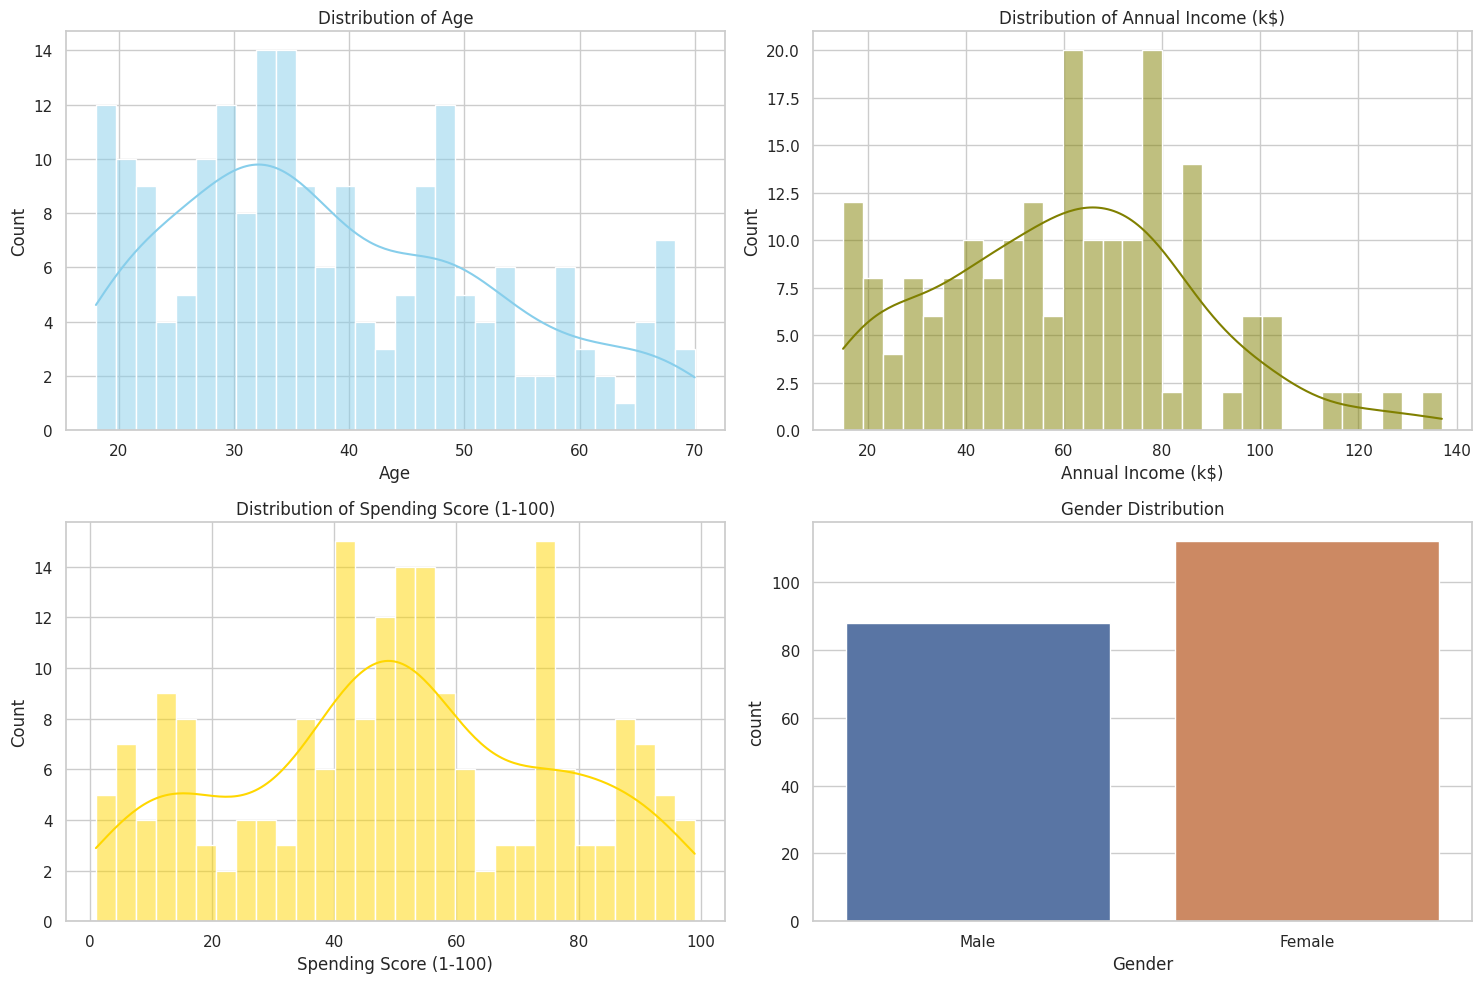

In [13]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of Age
sns.histplot(data['Age'], bins=30, kde=True, color="skyblue", ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Age')

# Distribution of Annual Income
sns.histplot(data['Annual Income (k$)'], bins=30, kde=True, color="olive", ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Annual Income (k$)')

# Distribution of Spending Score
sns.histplot(data['Spending Score (1-100)'], bins=30, kde=True, color="gold", ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Spending Score (1-100)')

# Gender distribution
sns.countplot(x='Gender', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

- Distribution of Age: The age distribution shows a wide range of ages, with a higher concentration of customers in their late 20s to early 40s.

- Distribution of Annual Income: The annual income distribution appears somewhat uniform, covering a broad range of incomes.

- Distribution of Spending Score: The spending score distribution is quite uniform across the range from 1 to 100.

- Gender Distribution: The gender distribution indicates a slightly higher number of female customers compared to male customers.

### 4. Clustering Using K-Means


The application of the K-Means clustering algorithm to the dataset will identify patterns and group similar data points. This method is instrumental in revealing underlying structures within the data, facilitating the discovery of meaningful clusters based on shared characteristics.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

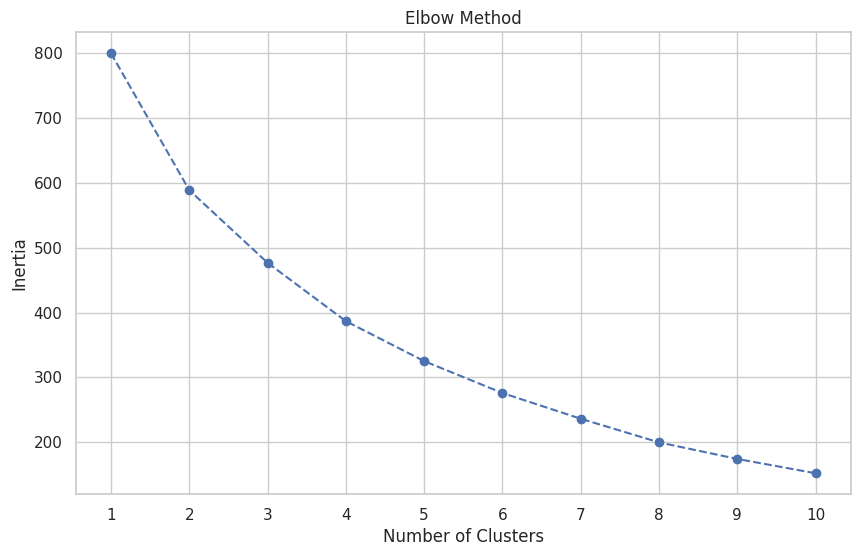

In [14]:
# Encoding the 'Gender' column using label encoding
label_encoder = LabelEncoder()
encoded_data = data.copy()
encoded_data['Gender'] = label_encoder.fit_transform(encoded_data['Gender'])

# Standardizing the encoded data
scaler = StandardScaler()
scaled_encoded_data = scaler.fit_transform(encoded_data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Using the elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_encoded_data)
    inertia.append(kmeans.inertia_)

# Plotting the results of the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

The Elbow Method plot, which illustrates inertia for varying numbers of clusters, reveals a discernible "elbow" point. This point, characterized by a slower rate of decrease in inertia, indicates an appropriate number of clusters. Based on the plot, the elbow point is identified around 5 clusters. Consequently, in the Selection of Clusters phase, 5 is chosen as the optimal number of clusters for further analysis.

### 5. Plotting the Cluster Boundary and Clusters

The final stage involves visualizing the clusters with their boundaries to comprehend the segmentation of the data. The K-Means model, fitted with 5 clusters, will be applied to the data. A scatter plot will be created, focusing on the "Annual Income (k$)" and "Spending Score (1-100)" features, with gender information incorporated via label encoding. This visualization is key to understanding the distribution and characteristics of the identified clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


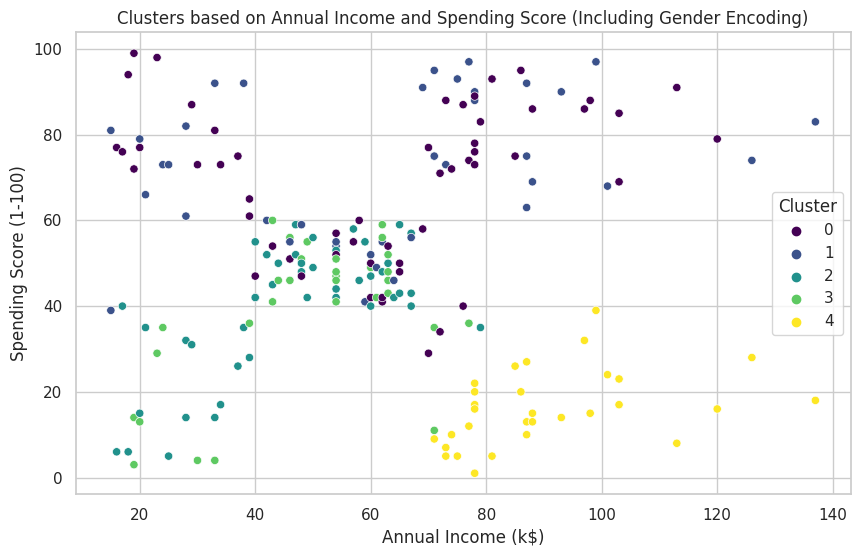

In [15]:
# Fitting K-Means to the data with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters_encoded = kmeans.fit_predict(scaled_encoded_data)

# Adding the cluster information to the encoded dataframe
encoded_data_with_clusters = encoded_data.copy()
encoded_data_with_clusters['Cluster'] = clusters_encoded

# Plotting the clusters for 'Annual Income (k$)' and 'Spending Score (1-100)'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=encoded_data_with_clusters, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', legend='full')
plt.title('Clusters based on Annual Income and Spending Score (Including Gender Encoding)')
plt.show()

- **Cluster 1**: This group is characterized by moderate to high annual income but lower spending scores. Customers in this segment may be more conservative with their spending despite having a reasonable amount of disposable income.

- **Cluster 2**: Customers in this segment have high annual income and high spending scores, indicating they are not hesitant to spend. They are likely to be the target for luxury and high-value products.

- **Cluster 3**: This group consists of customers with low annual income and low spending scores. They are more careful or limited in their spending, possibly due to budget constraints.

- **Cluster 4**: Featuring customers with low to moderate income but high spending scores, this segment might represent impulse buyers or those who prioritize spending on mall products despite lower income levels.

- **Cluster 5**: This final group includes customers with average income levels and moderate spending scores, possibly representing the general mall-going population with typical spending habits.

The segmentation of the mall customers using K-Means clustering revealed distinct groups based on gender, age, annual income, and spending score. Five unique clusters were identified, each representing a specific customer profile with varying spending behaviors and demographic characteristics. This segmentation enables targeted marketing strategies by identifying customer groups most likely to respond to different types of products and promotions. The analysis provides valuable insights for personalized customer engagement and optimizing resource allocation in marketing efforts.

